<a href="https://colab.research.google.com/github/kristenvonbecker/bootcamp_projects/blob/main/linear_regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# from matplotlib import rcParams
# sns.set_style("whitegrid")
# sns.set_context("poster")

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model.

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients?
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals:

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The California Housing data set contains data about California housing in 1990, grouped by block. Features are either central measures of tendency (e.g. median block income, average number of bedrooms per house) or totals (e.g. block population).


## Load the California Housing data set from `sklearn`
***

This data set is available via [sklearn](https://scikit-learn.org/stable/datasets/real_world.html) which is how we will access it today.  

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
housing.data.shape

(20640, 8)

In [5]:
# Print column names
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
# Print description of Boston housing data set
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Now let's explore the data set itself.

In [7]:
housing_df = pd.DataFrame(housing.data)
housing_df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


There are no column names in the DataFrame. Let's add those.

In [8]:
housing_df.columns = housing.feature_names
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Now we have a pandas DataFrame called `housing_df` containing all the data we want to use to predict California Housing prices.  Let's create a variable called `Price` which will contain the prices. This information is contained in the `target` data.

In [9]:
print(housing.target.shape)

(20640,)


In [10]:
housing_df['Price'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns.

In [11]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Scatterplots
***

Let's look at some scatter plots for three variables: `MedInc` (median household income), `AveOccup` (average number of household members) and `HouseAge` (median age of house).  

Text(0.5, 1.0, 'Housing Price vs. Household Income')

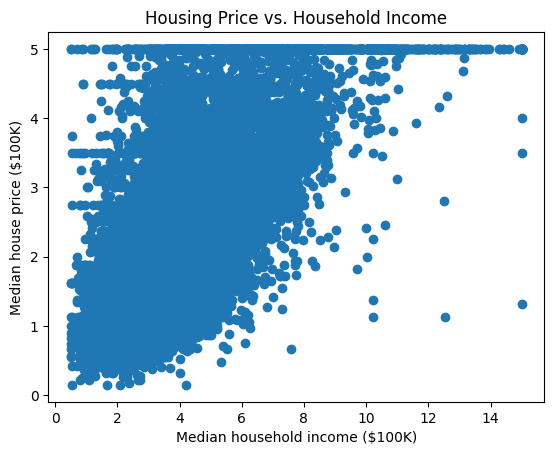

In [12]:
plt.scatter(housing_df['MedInc'], housing_df['Price'])
plt.xlabel("Median household income ($100K)")
plt.ylabel("Median house price ($100K)")
plt.title("Housing Price vs. Household Income")

Note: House price has clearly been capped at $500,000. There's definitely a linear trend.

Text(0.5, 1.0, 'Housing Price vs. Household Size')

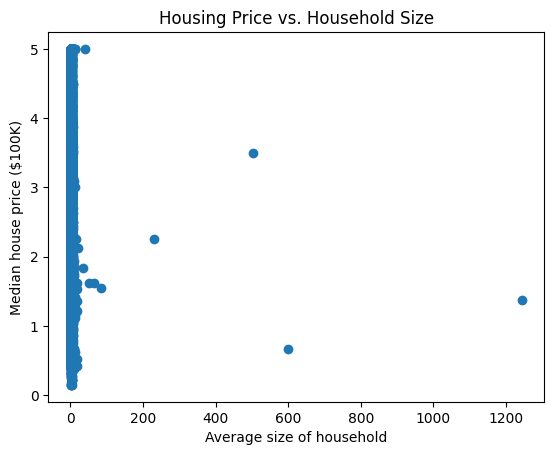

In [13]:
plt.scatter(housing_df['AveOccup'], housing_df['Price'])
plt.xlabel("Average size of household")
plt.ylabel("Median house price ($100K)")
plt.title("Housing Price vs. Household Size")

To spread out the vertical cluster of point, plot the x-axis on a log scale...

Text(0.5, 1.0, 'Housing Price vs. Household Size')

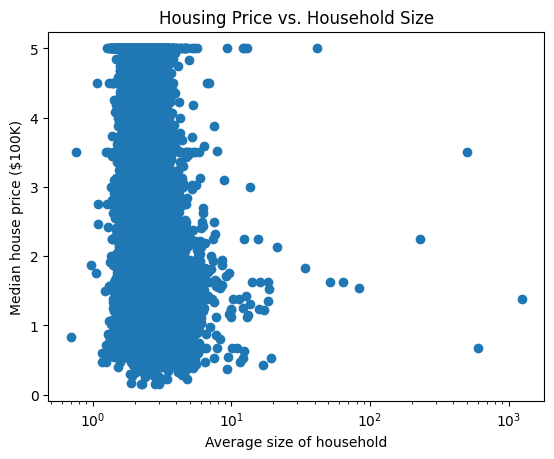

In [14]:
plt.scatter(housing_df['AveOccup'], housing_df['Price'])
plt.xscale('log')
plt.xlabel("Average size of household")
plt.ylabel("Median house price ($100K)")
plt.title("Housing Price vs. Household Size")

It seems there *might* be a very negative linear relation...

Text(0.5, 1.0, 'Housing Price vs. Age of House')

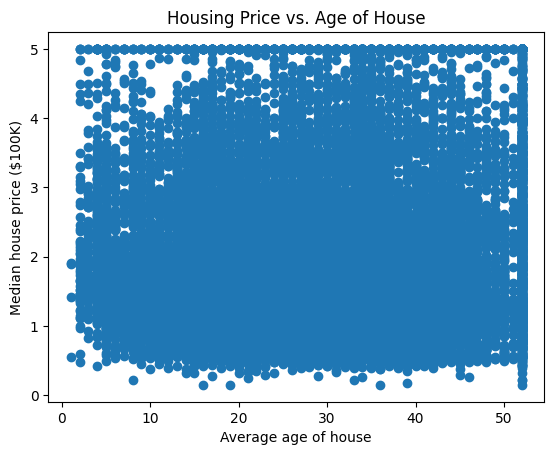

In [15]:
plt.scatter(housing_df['HouseAge'], housing_df['Price'])
plt.xlabel("Average age of house")
plt.ylabel("Median house price ($100K)")
plt.title("Housing Price vs. Age of House")

We can see from the above plot that average house age was also capped. We don't observe much of a relation between median house price and average house age.

Text(0.5, 1.0, 'Latitude vs. Longitude')

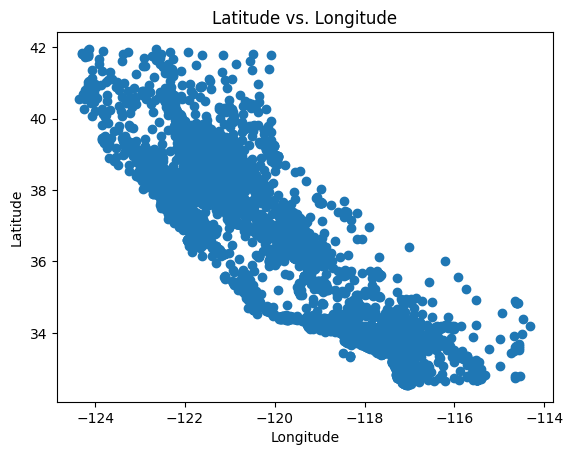

In [15]:
plt.scatter(housing_df['Longitude'], housing_df['Latitude'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Latitude vs. Longitude")

From this plot, we see more of our data coming from more highly populated areas (the Bay Area, Southern California, and the Central Valley), as well as more coastal regions. Data for the eastern and Northern portions of the state is thin.

Text(0.5, 1.0, 'Number of Rooms per House by Median Income')

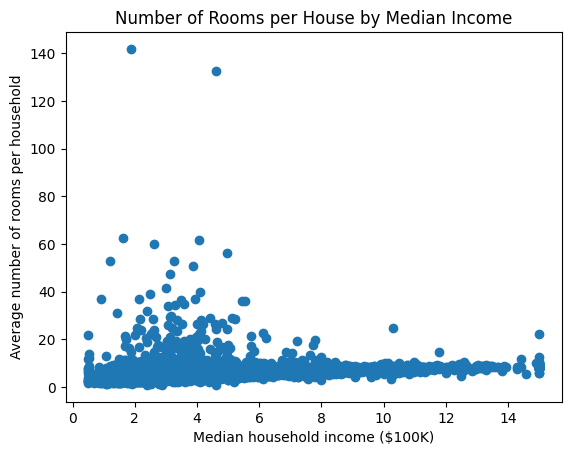

In [16]:
plt.scatter(housing_df['MedInc'], housing_df['AveRooms'])
plt.xlabel("Median household income ($100K)")
plt.ylabel("Average number of rooms per household")
plt.title("Number of Rooms per House by Median Income")

Note: This plot shows a nice linear relationship between income and house size. Note the collection of outliers for average number of rooms per household -- this caveat was mentioned in the output of the `.DESCR` attribute printed above:

"A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts."

Text(0.5, 1.0, 'Number of Rooms by Number of Bedrooms')

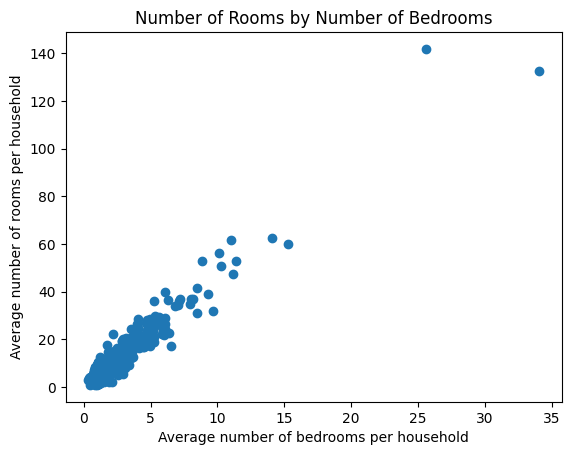

In [17]:
plt.scatter(housing_df['AveBedrms'], housing_df['AveRooms'])
plt.xlabel("Average number of bedrooms per household")
plt.ylabel("Average number of rooms per household")
plt.title("Number of Rooms by Number of Bedrooms")

This linar relationship is unsurprising. The same note about outliers applies in this case as well.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

Text(0, 0.5, 'Median house price ($100K)')

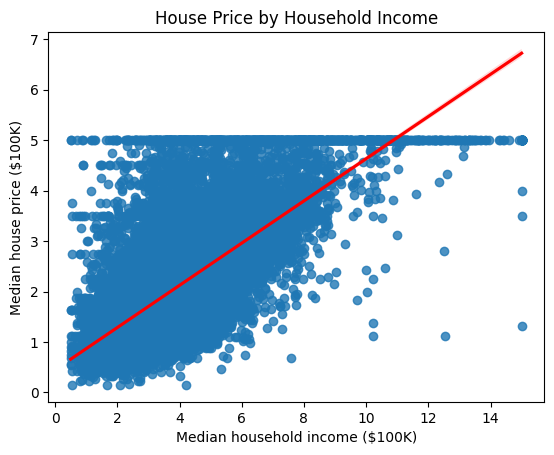

In [18]:
plot = sns.regplot(y="Price", x="MedInc", data=housing_df, fit_reg = True, line_kws=dict(color="r"))
plot.set_title("House Price by Household Income")
plot.set_xlabel("Median household income ($100K)")
plot.set_ylabel("Median house price ($100K)")

This graph shows the effect of the data cap on median house price: it appears to reduce the slope of the regression line. The model can be improved by either (a) removing these data points entirely, or (b) making the capped values null, then imputing their values.

### Histograms
***


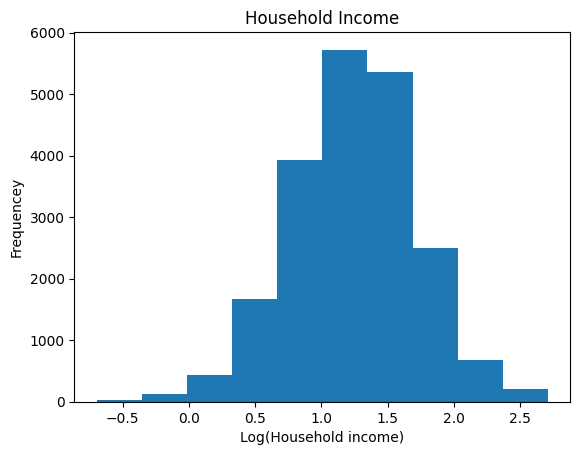

In [19]:
plt.hist(np.log(housing_df['MedInc']))
plt.title("Household Income")
plt.xlabel("Log(Household income)")
plt.ylabel("Frequencey")
plt.show()

Part 2 Checkup Exercise Set II

Exercise: In the above histogram, we took the logarithm of the median household income. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

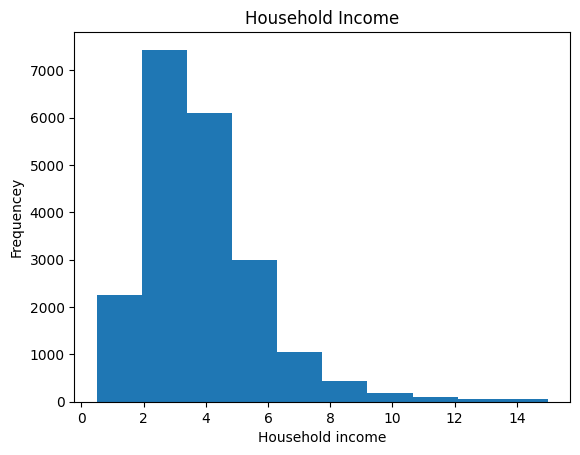

In [20]:
plt.hist(housing_df['MedInc'])
plt.title("Household Income")
plt.xlabel("Household income")
plt.ylabel("Frequencey")
plt.show()

# the log transform distributes a skew-right distribution into one which is more symmetric

## Part 3: Linear Regression with California Housing Data Example
***

Below we assume that:

$Y = $ California housing prices (called "target" data in Python, also the dependent variable or response variable), stored in a Pandas series.

$X = $ All the other features (or independent variables, predictors or explanatory variables), stored as a Pandas dataframe.

These data structures will be used to train a linear regression model and predict California housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [21]:
from statsmodels.regression.linear_model import OLS

In [22]:
X = housing_df.drop('Price', axis=1)
y = housing_df['Price']

model = OLS(y, X).fit()

In [23]:
model.params

MedInc        0.513515
HouseAge      0.015651
AveRooms     -0.182528
AveBedrms     0.865099
Population    0.000008
AveOccup     -0.004699
Latitude     -0.063946
Longitude    -0.016383
dtype: float64

#### Interpreting coefficients

We can interpret the `MedInc` coefficient (0.513515) as the *average* increase in house price (in $\$$100K) for each additional $\$$100K of median household income.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines.


Part 3 Checkup Exercise Set I

Exercise: Create a scatterplot between the predicted prices, available in `model.fittedvalues` and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.

Text(0.5, 1.0, 'Relationship between Actual & Predicted Prices')

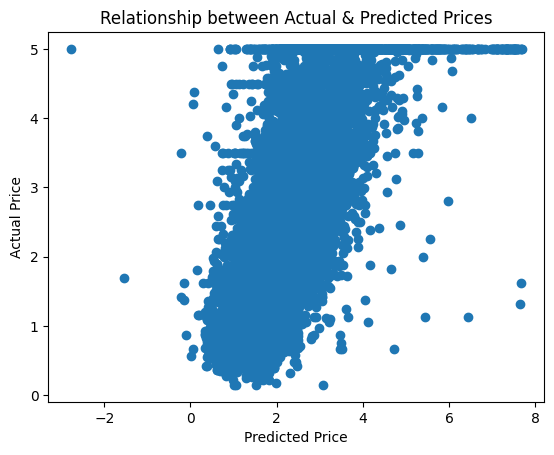

In [24]:
# What are the "original" prices? Actual prices?

plt.scatter(model.fittedvalues, housing_df['Price'])
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Relationship between Actual & Predicted Prices")

# This plot would be more meaningful if the axes were congruent! A "good" predictor will produce a scatterplot centered on the line y = x.

### Fitting Linear Regression using `sklearn`


In [25]:
from sklearn.linear_model import LinearRegression

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object?
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | ---
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

Output | Description
--- | ---
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares.

In [26]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, y)

LinearRegression()

Part 3 Checkup Exercise Set II

Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).

Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

Exercise: True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.


In [ ]:
# to not fit an intercept term
lm_no_int = LinearRegression(fit_intercept=False)
lm_no_int.fit(X, y)

# The only reason to not fit an intercept is when it's certain that the target variable should be zero if all of the input features are zero.
# In practice, the intercept should always be fit with the model since it conveys important information about the data.

In [63]:
# Residuals being normally distributed does not imply they are IID...
# For example, if the set of residuals was the union of two subsets each having different means, which would mean the data was not chosen from identical populations.

# ...Also, residuals being IID does not imply they are normally distributed...
# For example, if the model always predicted a value 1 more than the true value, then every residual value would be 1. This set is IID, but certainly not normally distributed.

# False: It's not necessary that the target variable be normally distributed, only the predicted error.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$:

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [27]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -36.94192020718441


In [28]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 8


In [29]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,MedInc,0.436693
1,HouseAge,0.009436
2,AveRooms,-0.107322
3,AveBedrms,0.645066
4,Population,-0.000004
5,AveOccup,-0.003787
6,Latitude,-0.421314
7,Longitude,-0.434514


Note: These coefficients are similar (but not equal to) the coefficients from the `statsmodels` linear regression model.

### Predict Prices

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`.

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [30]:
# first five predicted prices
lm.predict(X)[0:5]

array([4.13164983, 3.97660644, 3.67657094, 3.2415985 , 2.41358744])

Part 3 Checkup Exercise Set III

Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

Exercise: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?

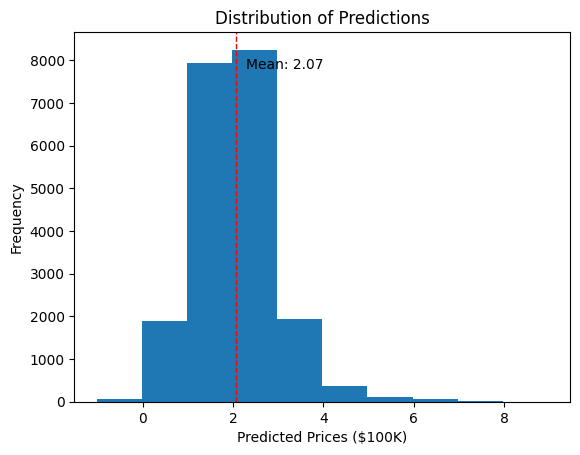

In [31]:
predicted = lm.predict(X)

plt.hist(predicted)
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Prices ($100K)')
plt.ylabel('Frequency')

plt.axvline(predicted.mean(), color='r', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(predicted.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(predicted.mean()))

plt.show()

# The predictions are quasi-normally distributed, with mean around $207,000
# There seem to be a few high outliers

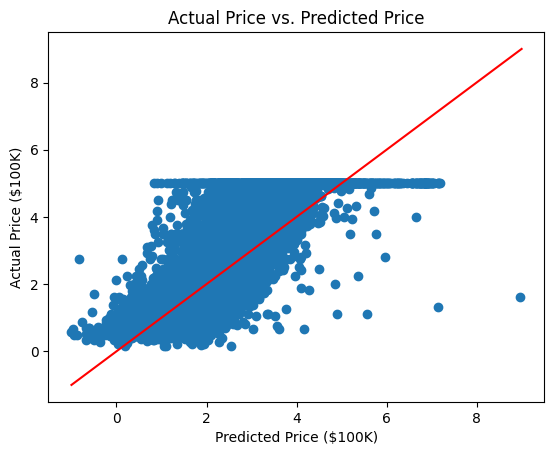

In [32]:
plt.scatter(predicted, housing_df['Price'])
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Predicted Price ($100K)')
plt.ylabel('Actual Price ($100K)')
x = np.arange(-1,10,10)
plt.plot(x,x,color='r')
plt.show()

I wonder if the capped house price values affects the quality of the model.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [33]:
print(np.sum((housing_df['Price'] - lm.predict(X)) ** 2))

10821.985154850292


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [34]:
print(np.sum((lm.predict(X) - np.mean(housing_df['Price']))**2))

16661.213038838214


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$

Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

Part 3 Checkup Exercise Set IV

Let's look at the relationship between `MedInc` and housing price.

Exercise: Try fitting a linear regression model using only the `MedInc` (median household income) and interpret the intercept and the coefficients.

Exercise: Calculate (or extract) the $R^2$ value. What does it tell you?

Exercise: Compute the $F$-statistic. What does it tell you?

Exercise: Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.

In [35]:
lm = LinearRegression()
X_inc = housing_df['MedInc'].values.reshape(-1,1)
lm.fit(X_inc, y)
print('Intercept: {}'.format(lm.intercept_))
print('Coeficient: {}'.format(lm.coef_))

# The model predicts that when the median household income is zero, the average
# housing price will be $45,086.

# The model predicts that for every $100K increase in in median household income,
# the average housing price will increase by $41,794.

Intercept: 0.45085576703267893
Coeficient: [0.41793849]


In [36]:
r_squared = lm.score(X_inc, y)
print('R^2: {}'.format(r_squared))

# The model predicts that just under half of the variance in average housing prices can be
# explained by changes in the median household income.

R^2: 0.47344749180719903


In [40]:
def f_score(model, X, Y):
    r_squared = model.score(X, Y)
    N = X.shape[0]
    K = X.shape[1]
    f_stat = r_squared / (1-r_squared) * (N - K - 1) / K
    return f_stat

lm = LinearRegression()
lm.fit(X_inc, y)

f = f_score(lm, X_inc, y)
print('F-stat: {}'.format(f))

# Degrees of freedom N-K = 20640-8 = 20632 and K-1 = 8-1 = 7
# The associated p-value is close to zero,
# So there is overwhelming evidence to reject the null hypothesis (that there is no linear relationship)
# in favor of the alternative (that there's a linear relationship between MedInc and Price).

F-stat: 18556.571631293507


Part 3 Checkup Exercise Set V

Fit a linear regression model using three independent variables

- `MedInc` (median household income)
- `AveRooms` (average number of rooms in a house)
- `Latitude` (latitude of block)
- `Longitude` (longitude of block)

Exercise: Compute or extract the $F$-statistic. What does it tell you about the model?

Exercise: Compute or extract the $R^2$ statistic. What does it tell you about the model?

Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

In [41]:
X = housing_df[['MedInc', 'AveRooms', 'Latitude', 'Longitude']]
y = housing_df['Price']

lm = LinearRegression().fit(X, y)

f = f_score(lm, X, y)
print('F = {}'.format(round(f, 2)))

r_squared = lm.score(X, y)
print('R^2: {}'.format(round(r_squared, 2)))

print('Model intercept: {}'.format(round(lm.intercept_, 2)))
print('Model coefficients: {}'.format(lm.coef_))

# The F-stat is quite high (yielding a very low p-value),
# implying that at least one of the variables in the model affects the target variable.
# The value of R^2 implies that almost 60% of the variability in the target can be explained by the model.
# Without scaling the features, it's hard to interpret the coefficients of the model.
# In particular, note that MedInc is measured in $100K, while Latitude and Longitude are measured in degrees.
# So a coefficient of 0.358 for Med Income means that for an increase of $100K in median household income,
# the model predicts that average house price will increase by about $35K.
# And a coefficient of -0.499 for Latitude means that for an increase of 1 degree latitude (moving northward about 69 miles)
# will decrease the model's prediction for Price by about $50,000.

F = 7275.61
R^2: 0.59
Model intercept: -42.93
Model coefficients: [ 0.35843904  0.01529828 -0.49906263 -0.51276203]


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

Part 4 Checkup Exercises

Exercise: Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?

In [45]:
X_full = housing_df[['MedInc', 'AveBedrms', 'Latitude']]
X_red1 = housing_df[['MedInc', 'AveBedrms']]
X_red2 = housing_df[['MedInc', 'Latitude']]
X_red3 = housing_df['MedInc'].values.reshape(-1,1)
X_all = [X_full, X_red1, X_red2, X_red3]
Y = housing_df['Price']

for X in X_all:
    lm = LinearRegression()
    lm.fit(X, Y)
    r_squared = lm.score(X, Y)
    f = f_score(lm, X, Y)
    try:
        features = list(X.columns)
    except AttributeError:
        features = ['MedInc']
    print('A linear model using features {} has:'.format(features))
    print('R^2 = {}'.format(round(r_squared,2)))
    print('F = {}\n'.format(round(f, 2)))

def f_nested(model_redu, model_full, X_redu, X_full, Y):
    diff_r_squared = model_redu.score(X_redu, Y) - model_full.score(X_full, Y)
    diff_DF = X_full.shape[1] - X_redu.shape[1]
    r_squared_full = model_full.score(X_full, Y)
    DF_full = X_full.shape[0] - X_full.shape[1] - 1
    f_stat = diff_r_squared / diff_DF * DF_full / r_squared_full
    return f_stat

for i in [1, 2]:
    lm_full = LinearRegression()
    lm_full.fit(X_all[0], Y)
    lm_redu = LinearRegression()
    lm_redu.fit(X_all[i], Y)
    f = f_nested(lm_redu, lm_full, X_all[i], X_all[0], Y)
    print('Comparing {} and {}'.format(list(X_all[0].columns), list(X_all[i].columns)),
          'F = {}'.format(round(f,2)))
    lm_full = LinearRegression()
    lm_full.fit(X_all[i], Y)
    lm_redu = LinearRegression()
    lm_redu.fit(X_all[3], Y)
    f = f_nested(lm_redu, lm_full, X_all[3], X_all[i], Y)
    print("Comparing {} and ['MedInc']".format(list(X_all[i].columns)),
          'F = {}\n'.format(round(f,2)))

A linear model using features ['MedInc', 'AveBedrms', 'Latitude'] has:
R^2 = 0.48
F = 6386.95

A linear model using features ['MedInc', 'AveBedrms'] has:
R^2 = 0.47
F = 9278.44

A linear model using features ['MedInc', 'Latitude'] has:
R^2 = 0.48
F = 9580.77

A linear model using features ['MedInc'] has:
R^2 = 0.47
F = 18556.57

Comparing ['MedInc', 'AveBedrms', 'Latitude'] and ['MedInc', 'AveBedrms'] F = -343.01
Comparing ['MedInc', 'AveBedrms'] and ['MedInc'] F = -0.7

Comparing ['MedInc', 'AveBedrms', 'Latitude'] and ['MedInc', 'Latitude'] F = -0.14
Comparing ['MedInc', 'Latitude'] and ['MedInc'] F = -343.58




## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


Part 5 Checkup Exercises

Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.
    
Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

Exercise: Construct a quantile plot of the residuals. What does the plot tell you?

Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

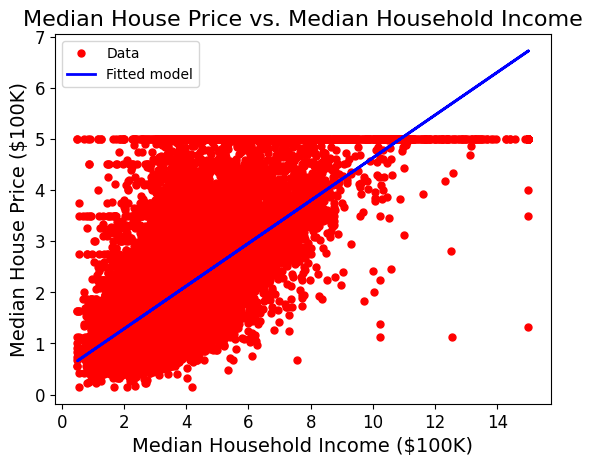

In [49]:
lm = LinearRegression()
X = housing_df['MedInc'].values.reshape(-1,1)
Y = housing_df['Price']
lm.fit(X, Y)

import matplotlib.pylab as pylab

params = {'xtick.labelsize': 12,
          'ytick.labelsize': 12}
pylab.rcParams.update(params)

plt.plot(X, Y, 'ro', markersize=5)
plt.plot(X, lm.predict(X), 'b', linewidth=2)
plt.legend(['Data', 'Fitted model'], fontsize=10)
plt.xlabel('Median Household Income ($100K)', fontsize=14)
plt.ylabel('Median House Price ($100K)', fontsize=14)
plt.title('Median House Price vs. Median Household Income', fontsize=16)
plt.grid(False)
plt.show()

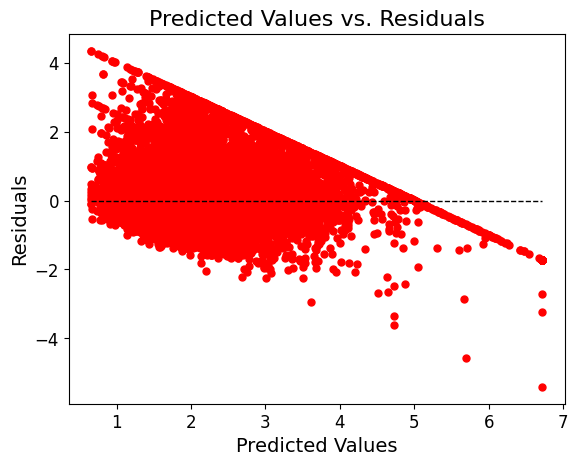

In [51]:
lm = LinearRegression()
X = housing_df['MedInc'].values.reshape(-1,1)
Y = housing_df['Price']
lm.fit(X, Y)

predicted = lm.predict(X)

plt.plot(predicted, Y - predicted, 'ro', markersize=5)
plt.plot([min(predicted), max(predicted)], [0,0], 'k--', linewidth=1)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Predicted Values vs. Residuals', fontsize=16)
plt.grid(False)
plt.show()

In [ ]:
# I'm not sure what a quantile plot is (a Q-Q plot?)

# These outliers represent observations that fall into a "max price" bucket. Since it's not clear what the true
# price is for each one; IMHO, they should all be removed.
is_outlier = bos.PRICE == 50
print('There are {} outliers (PRICE = $50K)'.format(is_outlier.sum()))

# Not sure what a leverage plot is...


There are 16 outliers (PRICE = $50K)
